# Importing some libraries

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [51]:
df = pd.read_csv('Churn_Modelling.csv')

In [52]:
df.shape

(10000, 14)

In [53]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
df.Age.max()

92

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

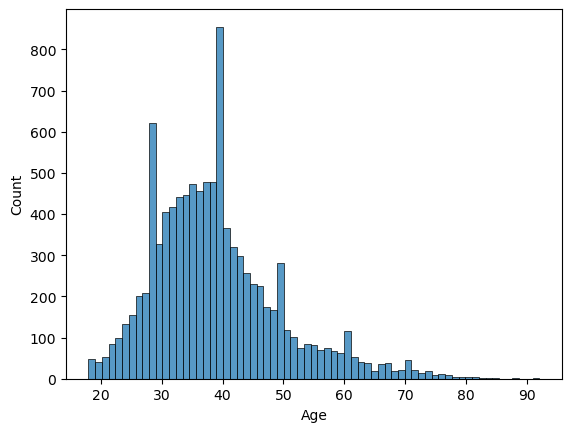

In [55]:
sns.histplot(df['Age'])

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Balance', ylabel='Count'>

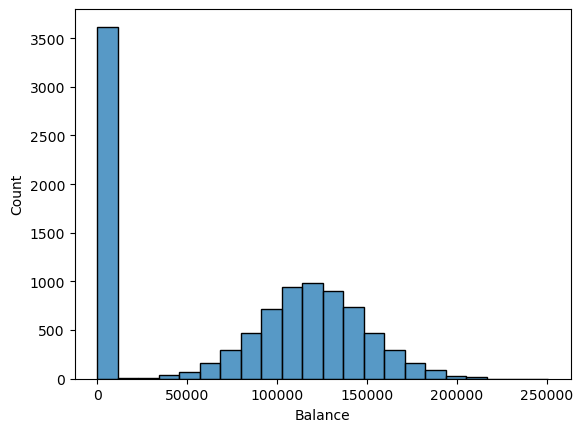

In [56]:

sns.histplot(df['Balance'])

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

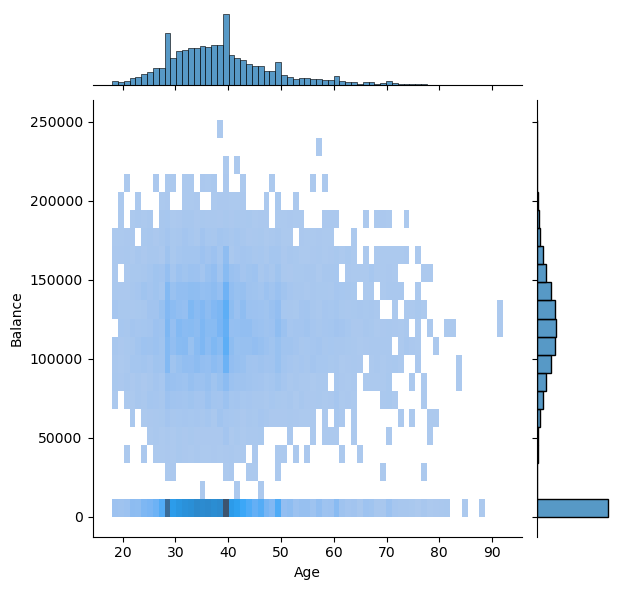

In [57]:
#combining the plots
sns.jointplot(x=df['Age'], y=df['Balance'], kind='hist')
plt.show()


# Droping unneccessry columns

In [59]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

# Creating bins for Age columns

In [60]:
from sklearn.preprocessing import KBinsDiscretizer
bined=KBinsDiscretizer(encode='ordinal',strategy='uniform',dtype=None)

In [61]:
bined

KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [62]:
df['age_bin']=bined.fit_transform(df[['Age']])

In [63]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'age_bin'],
      dtype='object')

<Axes: >

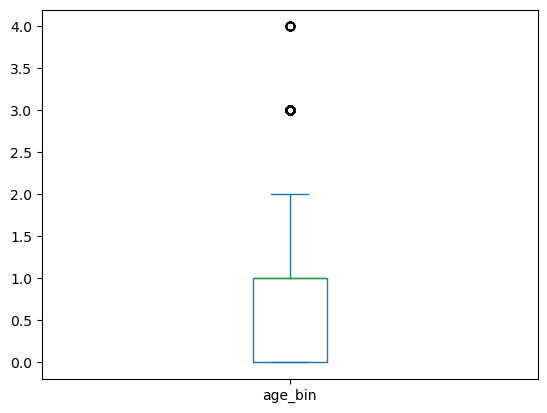

In [64]:
df['age_bin'].plot(kind='box')

In [65]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
age_bin               5
dtype: int64

In [66]:

# time=[18,30,45,60,75,80]

# category=[0,1,2,3,4]

# df["age_bin"] = pd.cut(df["Age"], bins=time, labels=category, right=False)

In [67]:
df['age_bin'].value_counts()

age_bin
1.0    5500
0.0    2790
2.0    1351
3.0     335
4.0      24
Name: count, dtype: int64

In [68]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'age_bin'],
      dtype='object')

In [69]:
df.drop(columns=['Age'],inplace=True)

# checking correlation

In [70]:
encoder = LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])

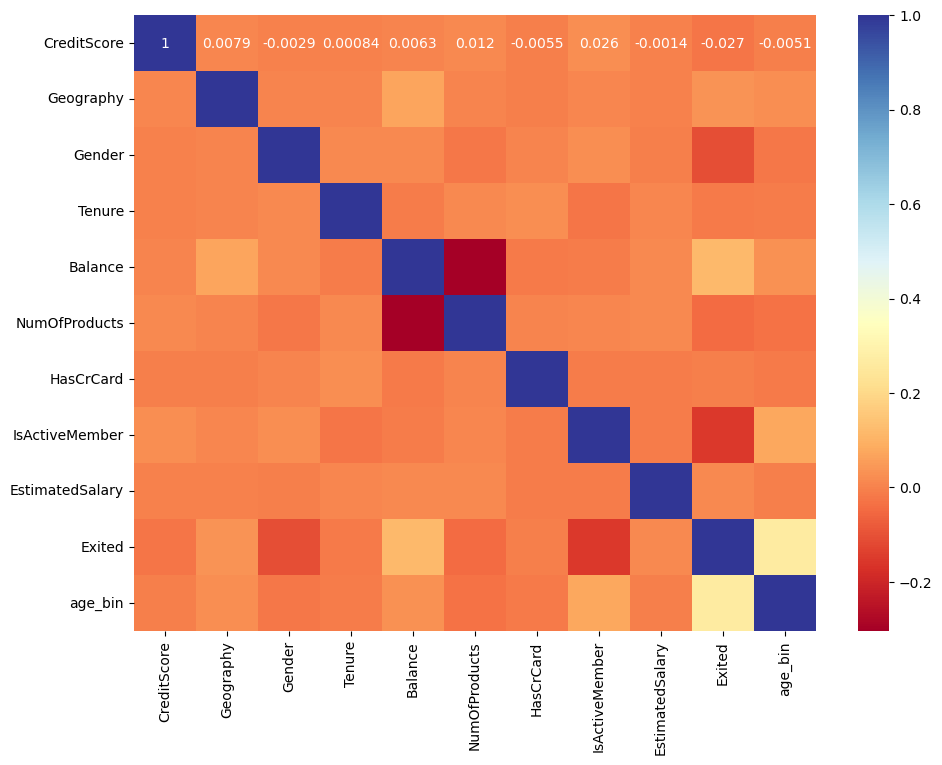

In [71]:
plt.subplots(figsize=(11, 8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()

In [72]:
X = df.drop(columns=['Exited']).values
y = df['Exited'].values

In [73]:
X

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0134888e+05, 1.0000000e+00],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.1254258e+05, 1.0000000e+00],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.1393157e+05, 1.0000000e+00],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        4.2085580e+04, 1.0000000e+00],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        9.2888520e+04, 1.0000000e+00],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.8190780e+04, 0.0000000e+00]])

# One hot encoding

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('onehot',OneHotEncoder(),[1])],remainder='passthrough')

In [75]:
X = ct.fit_transform(X)


In [76]:
ct = ColumnTransformer(transformers=[('onehot',OneHotEncoder(),[4])],remainder='passthrough')
X = ct.fit_transform(X)


In [77]:
X[4]

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 8.5000000e+02, 2.0000000e+00, 1.2551082e+05,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 7.9084100e+04,
       1.0000000e+00])

In [78]:
from sklearn.preprocessing import StandardScaler
sta=StandardScaler()
X = sta.fit_transform(X)

In [79]:
X

array([[ 1.09598752, -1.09598752,  0.99720391, ...,  0.97024255,
         0.02188649,  0.09274048],
       [ 1.09598752, -1.09598752, -1.00280393, ...,  0.97024255,
         0.21653375,  0.09274048],
       [ 1.09598752, -1.09598752,  0.99720391, ..., -1.03067011,
         0.2406869 ,  0.09274048],
       ...,
       [ 1.09598752, -1.09598752,  0.99720391, ...,  0.97024255,
        -1.00864308,  0.09274048],
       [-0.91241915,  0.91241915, -1.00280393, ..., -1.03067011,
        -0.12523071,  0.09274048],
       [ 1.09598752, -1.09598752,  0.99720391, ..., -1.03067011,
        -1.07636976, -1.2378259 ]])

# Train Test Split

In [80]:
sm = SMOTE(random_state = 42)
X_res,y_res = sm.fit_resample(X,y)
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=7)

In [81]:

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Importing the models

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#0from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [84]:
classifiers = {}


classifiers['Logistic Regression'] = LogisticRegression()
classifiers['K-Nearest Neighbors'] = KNeighborsClassifier()
classifiers['Support Vector Machine'] = SVC()
classifiers['Decision Tree'] = DecisionTreeClassifier()
classifiers['Random Forest'] = RandomForestClassifier()


# Training the models

In [85]:
for name, model in classifiers.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("="*50)

Training Logistic Regression...
Evaluating Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1580
           1       0.70      0.67      0.69      1606

    accuracy                           0.69      3186
   macro avg       0.69      0.69      0.69      3186
weighted avg       0.69      0.69      0.69      3186

Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1580
           1       0.79      0.92      0.85      1606

    accuracy                           0.84      3186
   macro avg       0.85      0.83      0.83      3186
weighted avg       0.85      0.84      0.83      3186

Training Support Vector Machine...
Evaluating Support Vector Machine...
Classification Report for Support Vector Machine

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# from sklearn.metrics import plot_confusion_matrix


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

for name, model in classifiers.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    
    # Print evaluation metrics
    print(f"Evaluation Metrics for {name}:")
    for metric in metrics:
        print(f"{metric}: {scores[metric]}")
    
    # Confusion Matrix
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    
    print("="*50)

Evaluating Logistic Regression...
Evaluation Metrics for Logistic Regression:
Accuracy: 0.687382297551789
Precision: 0.6957637997432606
Recall: 0.6749688667496887
F1-Score: 0.6852085967130215
ROC AUC: 0.6874844333748443
Confusion Matrix for Logistic Regression:
[[1106  474]
 [ 522 1084]]
Evaluating K-Nearest Neighbors...
Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.835216572504708
Precision: 0.786737400530504
Recall: 0.9234122042341221
F1-Score: 0.8496132913205385
ROC AUC: 0.8344909122436432
Confusion Matrix for K-Nearest Neighbors:
[[1178  402]
 [ 123 1483]]
Evaluating Support Vector Machine...
Evaluation Metrics for Support Vector Machine:
Accuracy: 0.7802887633396108
Precision: 0.785264483627204
Recall: 0.7764632627646326
F1-Score: 0.7808390732623669
ROC AUC: 0.780320238977253
Confusion Matrix for Support Vector Machine:
[[1239  341]
 [ 359 1247]]
Evaluating Decision Tree...
Evaluation Metrics for Decision Tree:
Accuracy: 0.8248587570621468
Precision: 0.8214723926380368
R

In [87]:
para_grid = {'n_estimators': [100, 200, 300,500], 'max_depth': [None, 10, 20, 30,50], 'min_samples_split': [2, 5, 10,20]}

# Model Evaluation

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [89]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

for name, model in classifiers.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    
    # Print evaluation metrics
    print(f"Evaluation Metrics for {name}:")
    for metric in metrics:
        print(f"{metric}: {scores[metric]}")
    
    # Confusion Matrix
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    
    print("="*50)

Evaluating Logistic Regression...
Evaluation Metrics for Logistic Regression:
Accuracy: 0.687382297551789
Precision: 0.6957637997432606
Recall: 0.6749688667496887
F1-Score: 0.6852085967130215
ROC AUC: 0.6874844333748443
Confusion Matrix for Logistic Regression:
[[1106  474]
 [ 522 1084]]
Evaluating K-Nearest Neighbors...
Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.835216572504708
Precision: 0.786737400530504
Recall: 0.9234122042341221
F1-Score: 0.8496132913205385
ROC AUC: 0.8344909122436432
Confusion Matrix for K-Nearest Neighbors:
[[1178  402]
 [ 123 1483]]
Evaluating Support Vector Machine...
Evaluation Metrics for Support Vector Machine:
Accuracy: 0.7802887633396108
Precision: 0.785264483627204
Recall: 0.7764632627646326
F1-Score: 0.7808390732623669
ROC AUC: 0.780320238977253
Confusion Matrix for Support Vector Machine:
[[1239  341]
 [ 359 1247]]
Evaluating Decision Tree...
Evaluation Metrics for Decision Tree:
Accuracy: 0.8248587570621468
Precision: 0.8214723926380368
R

Based on the evaluation metrics, the best model appears to be Random Forest so far

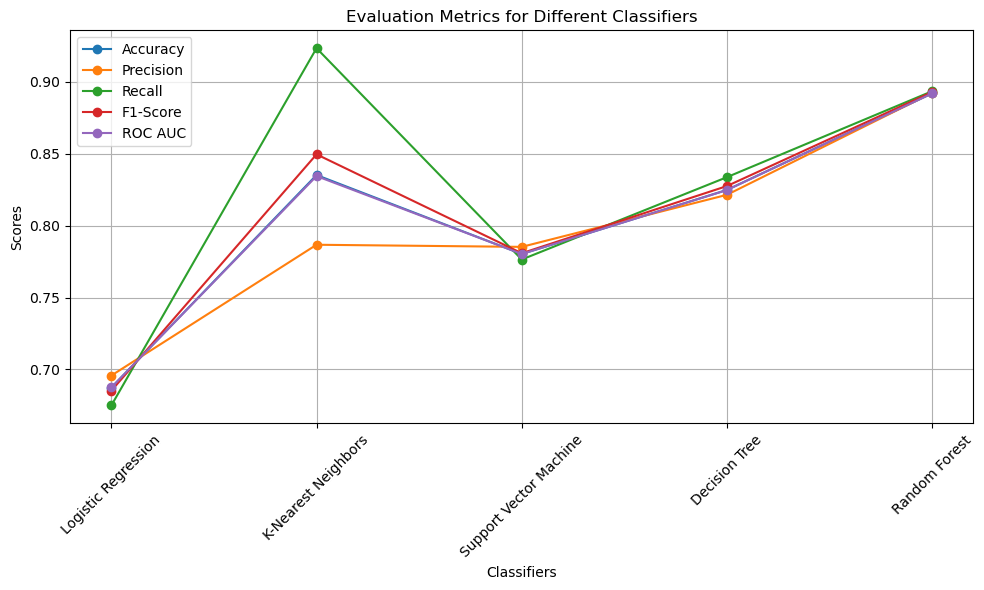

In [91]:
import matplotlib.pyplot as plt

# Initialize lists to store scores for each metric
metric_scores = {metric: [] for metric in metrics}

# Loop through classifiers and calculate scores
for name, model in classifiers.items():
    y_pred = model.predict(X_test)
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    # Store scores for each metric
    for metric in metrics:
        metric_scores[metric].append(scores[metric])

# Plotting
plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.plot(list(classifiers.keys()), metric_scores[metric], label=metric, marker='o')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Evaluation Metrics for Different Classifiers')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


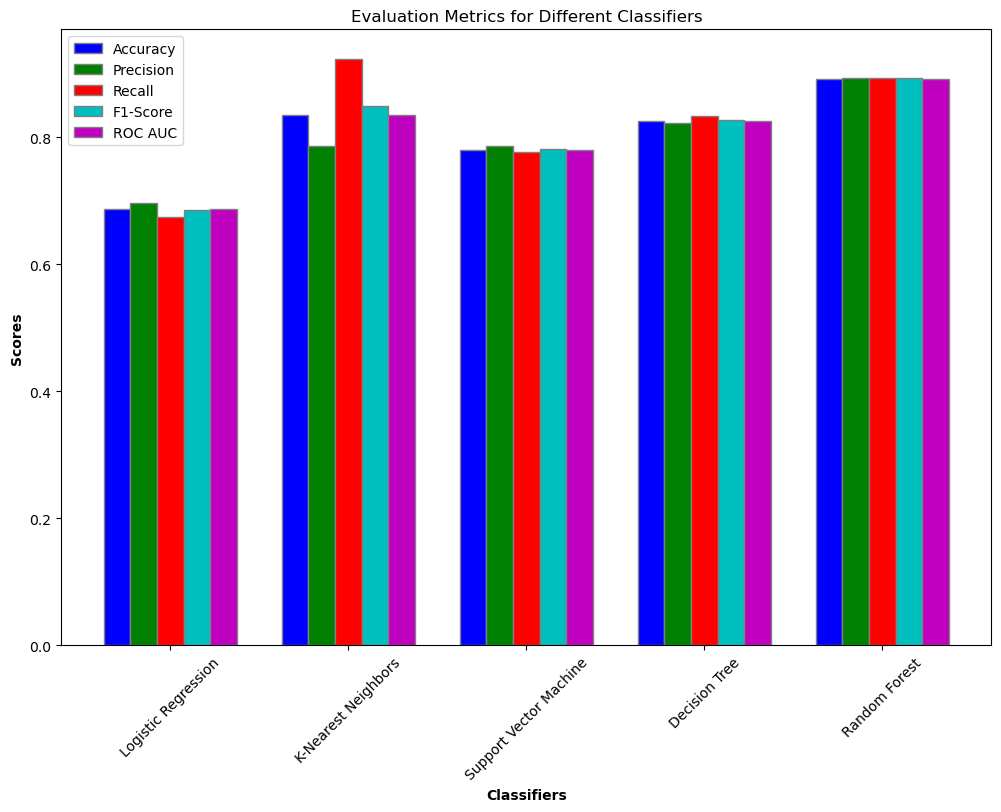

In [93]:
import numpy as np

# Set up figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bar
bar_width = 0.15

# Set position of bar on X axis
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Define colors for each metric
colors = ['b', 'g', 'r', 'c', 'm']

# Plotting bars for each metric
for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(r1 + i * bar_width, [metric_scores[metric][i] for i in range(len(classifiers))], color=color, width=bar_width, edgecolor='grey', label=metric)

# Add xticks on the middle of the group bars
ax.set_xlabel('Classifiers', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_xticks([r + 2 * bar_width for r in range(len(classifiers))])
ax.set_xticklabels(classifiers.keys(), rotation=45)

# Create legend & Show graphic
ax.legend()
plt.title('Evaluation Metrics for Different Classifiers')
plt.show()


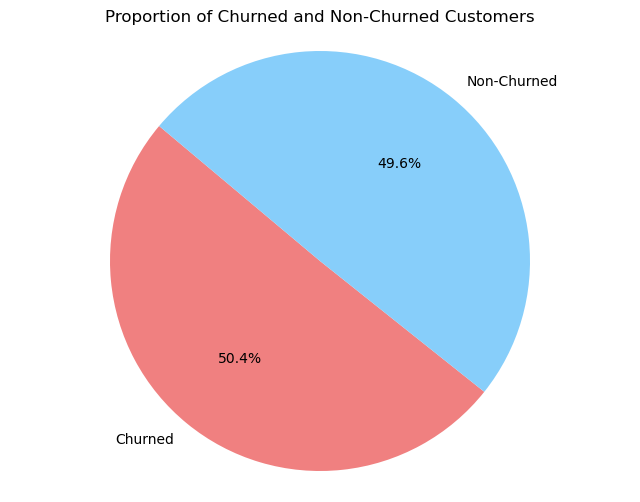

In [94]:
# Calculate the number of churned and non-churned users
churned_count = sum(y_test == 1)
non_churned_count = sum(y_test == 0)

# Draw a pie chart
plt.figure(figsize=(8, 6))
labels = ['Churned', 'Non-Churned']
sizes = [churned_count, non_churned_count]
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportion of Churned and Non-Churned Customers')
plt.show()


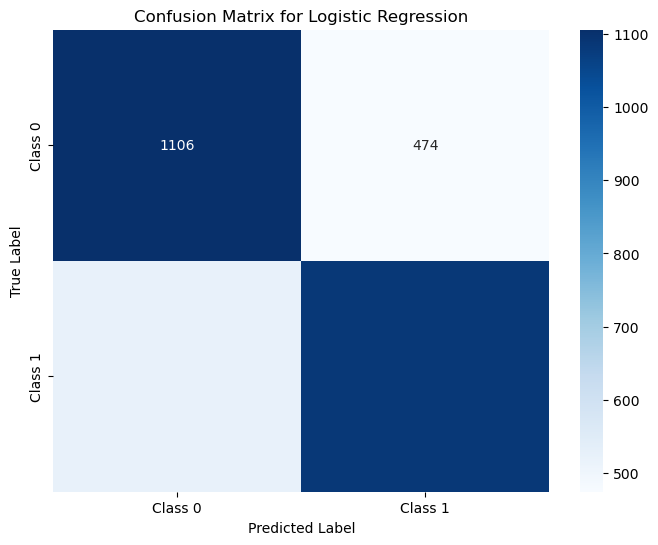

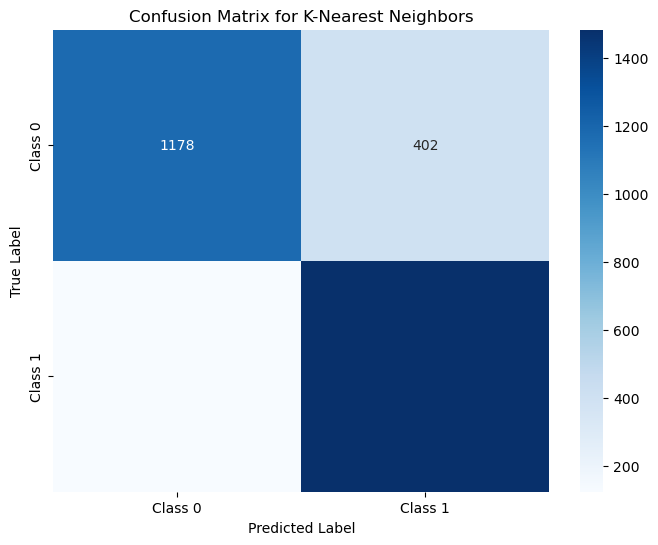

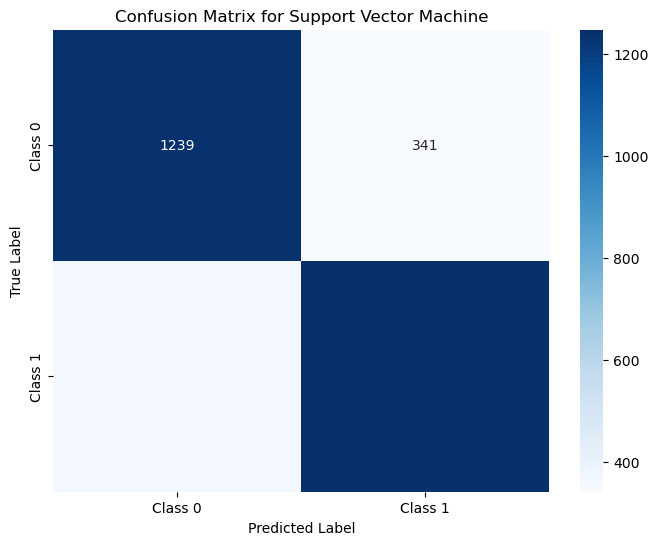

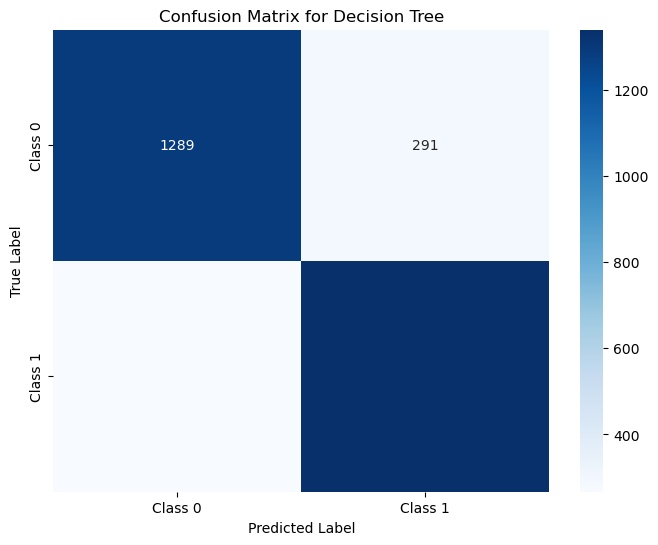

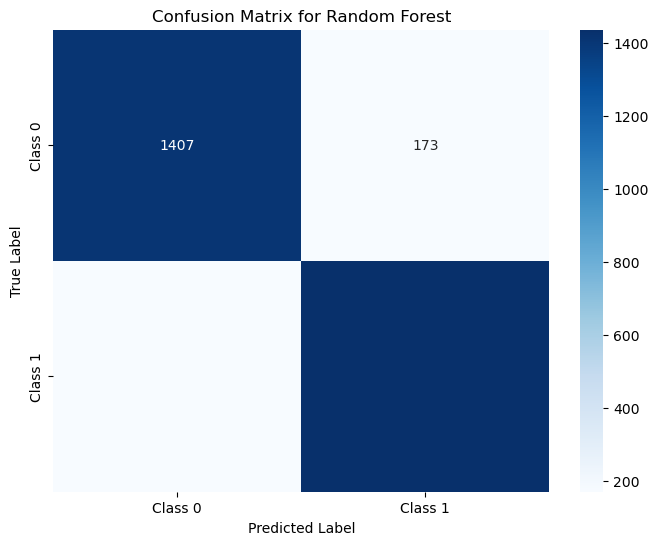

In [95]:
# for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Iterate over classifiers
for name, model in classifiers.items():
    # Calculate predictions
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [97]:
#AUC curve

In [98]:
#Modal accuracy Loss accuracy

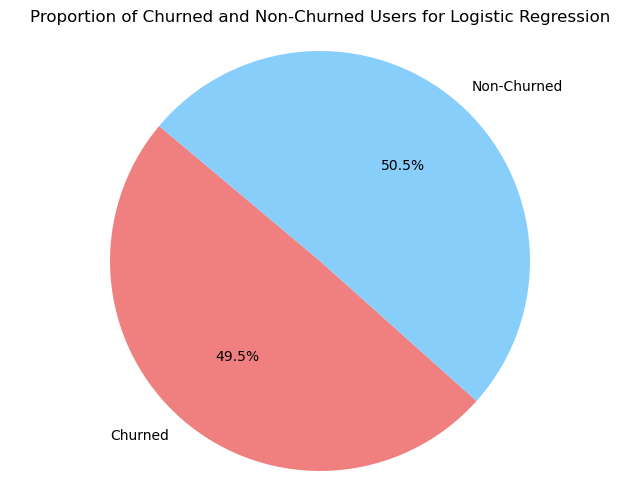

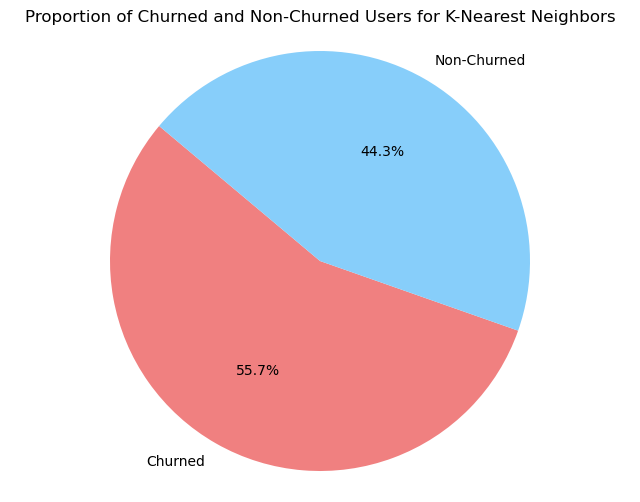

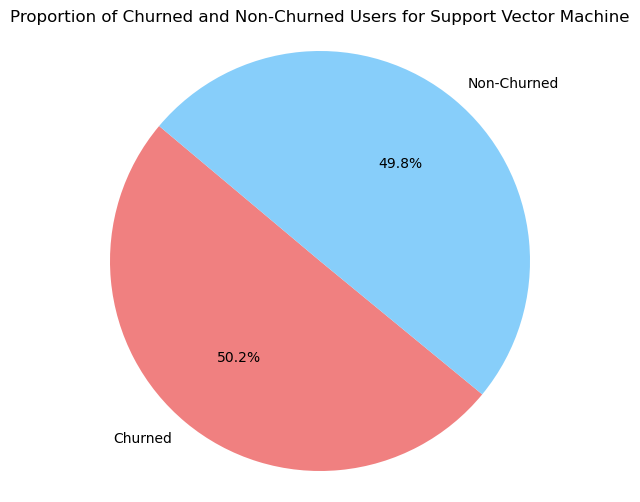

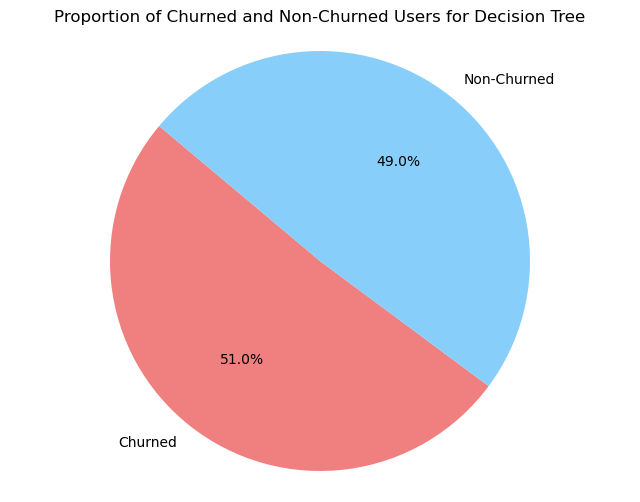

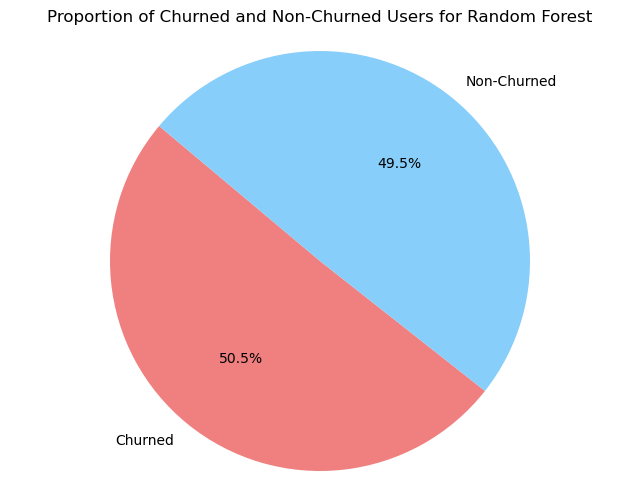

In [99]:
# Initialize dictionaries to store churned and non-churned counts for each algorithm
churned_counts = {}
non_churned_counts = {}

# Loop through classifiers
for name, model in classifiers.items():
    y_pred = model.predict(X_test)
    # Calculate churned and non-churned counts
    churned_counts[name] = sum((y_test == 1) & (y_pred == 1))
    non_churned_counts[name] = sum((y_test == 0) & (y_pred == 0))

# Plotting
for name in classifiers.keys():
    plt.figure(figsize=(8, 6))
    labels = ['Churned', 'Non-Churned']
    sizes = [churned_counts[name], non_churned_counts[name]]
    colors = ['lightcoral', 'lightskyblue']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Proportion of Churned and Non-Churned Users for {name}')
    plt.show()
